# 🚀 Quantum Drift: Passenger Fate Prediction
This notebook includes data loading, preprocessing, and visual EDA for the Spaceship Titanic dataset.

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure output directory exists
os.makedirs("output", exist_ok=True)


Matplotlib is building the font cache; this may take a moment.


## 1. Load and Clean Data

In [2]:

# Load cleaned training data
df = pd.read_csv("../output/cleaned_train.csv")

# Fill and convert types early to avoid visual errors
df['CryoSleep'] = df['CryoSleep'].fillna(False).astype(bool)
df['VIP'] = df['VIP'].fillna(False).astype(bool)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['TotalSpend'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)


## 2. Histogram: Age Distribution

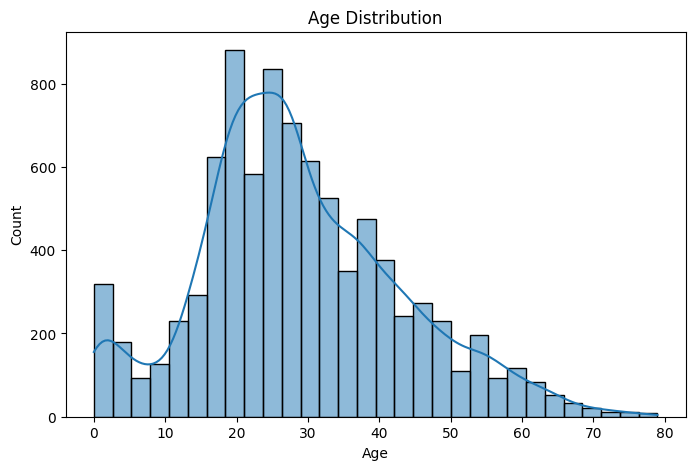

In [3]:

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig("output/plot_age_histogram.png")
plt.show()


## 3. Boxplot: TotalSpend

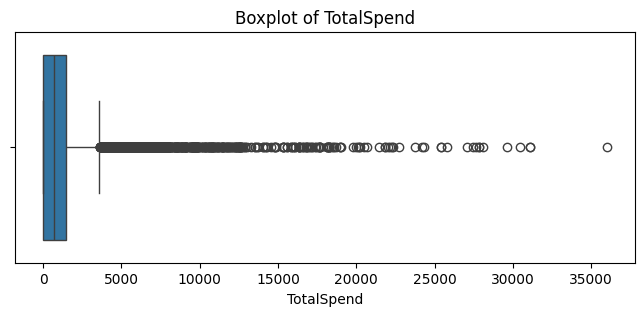

In [4]:

plt.figure(figsize=(8, 3))
sns.boxplot(x=df['TotalSpend'])
plt.title("Boxplot of TotalSpend")
plt.savefig("output/plot_totalspend_boxplot.png")
plt.show()


## 4. Correlation Matrix

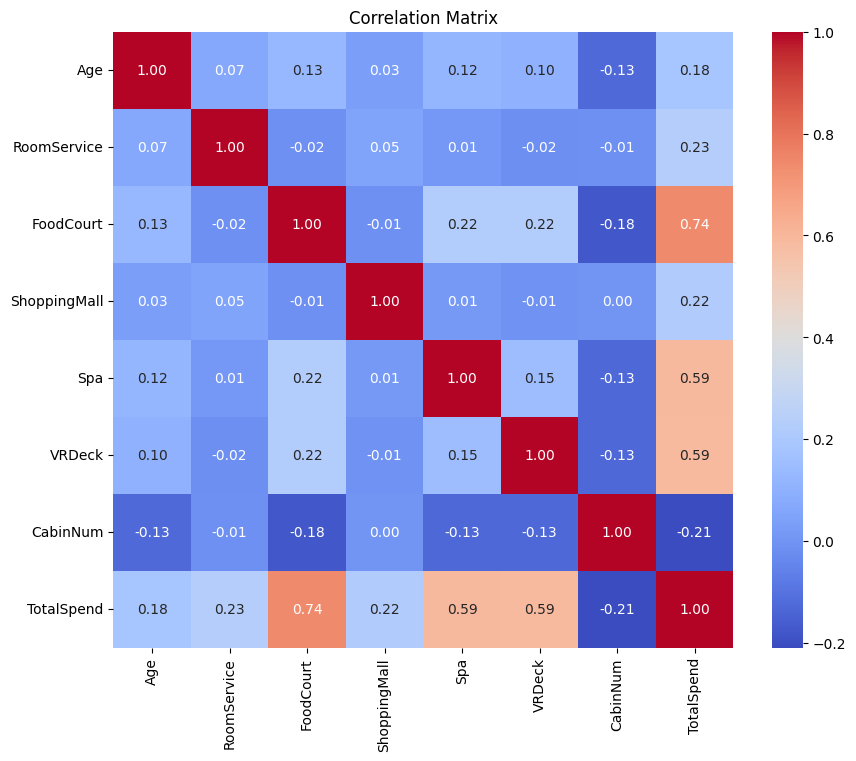

In [5]:

numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.savefig("output/plot_correlation_matrix.png")
plt.show()


## 5. Bar Charts: CryoSleep and VIP

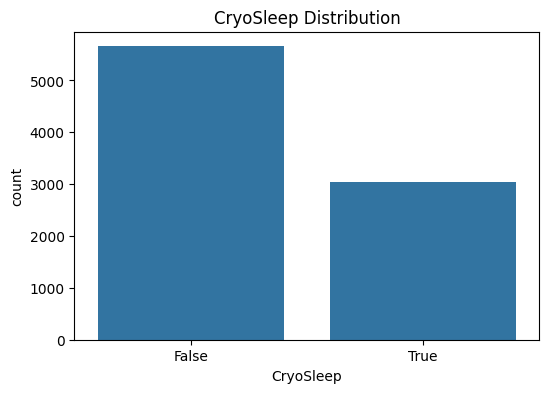

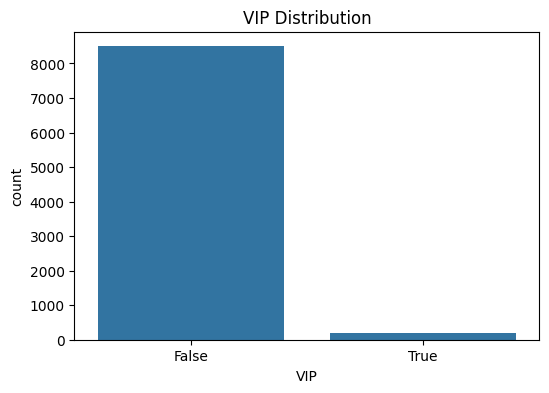

In [6]:

plt.figure(figsize=(6, 4))
sns.countplot(x='CryoSleep', data=df)
plt.title("CryoSleep Distribution")
plt.savefig("output/plot_cryo_count.png")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='VIP', data=df)
plt.title("VIP Distribution")
plt.savefig("output/plot_vip_count.png")
plt.show()


## 6. Stacked Bar Chart: Transported vs VIP

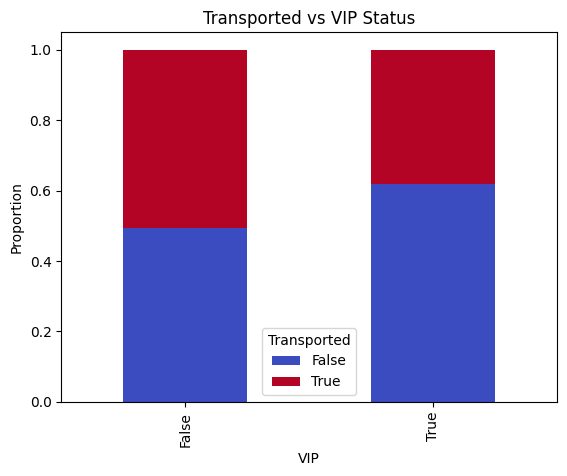

In [7]:

vip_transport = pd.crosstab(df['VIP'], df['Transported'], normalize='index')
vip_transport.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Transported vs VIP Status")
plt.xlabel("VIP")
plt.ylabel("Proportion")
plt.legend(title='Transported')
plt.savefig("output/plot_vip_vs_transported.png")
plt.show()
